In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("car data.csv")  # replace with correct path if needed

# Display first few rows
print(df.head())
print("\nColumn Names:\n", df.columns)

# Check for null values
print("\nMissing values:\n", df.isnull().sum())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Column Names:
 Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

Missing values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0


In [10]:
# Label Encoding for categorical columns
le = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Split into features and target
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and parameter grid
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search with 5-fold CV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Model Evaluation Metrics:
MAE:  0.58
MSE:  0.75
RMSE: 0.87
R²:   0.97


## Analysis & Model

I used **Random Forest Regressor** due to:

- Strong performance on structured/tabular data  
- Resistance to overfitting  
- Ability to handle both numeric and categorical data  
- Built-in feature importance scores

Applied **GridSearchCV** to improve model performance by finding the best combination of parameters.

---

## What is GridSearchCV?

`GridSearchCV` is a tool that:

- Trains the model with **all combinations** of specified parameters  
- Uses **cross-validation** to ensure reliability  
- Selects the **best-performing model**

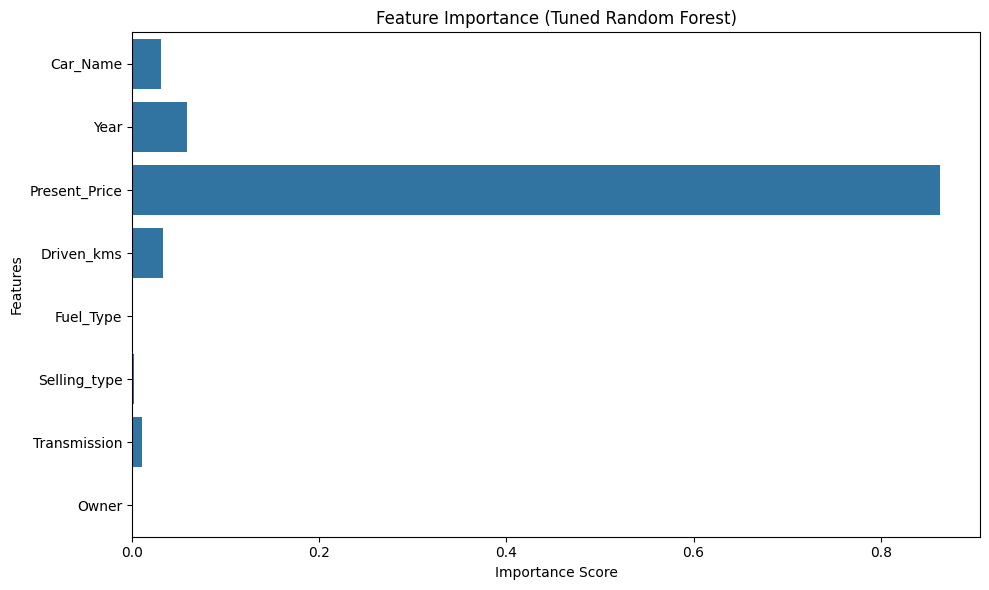

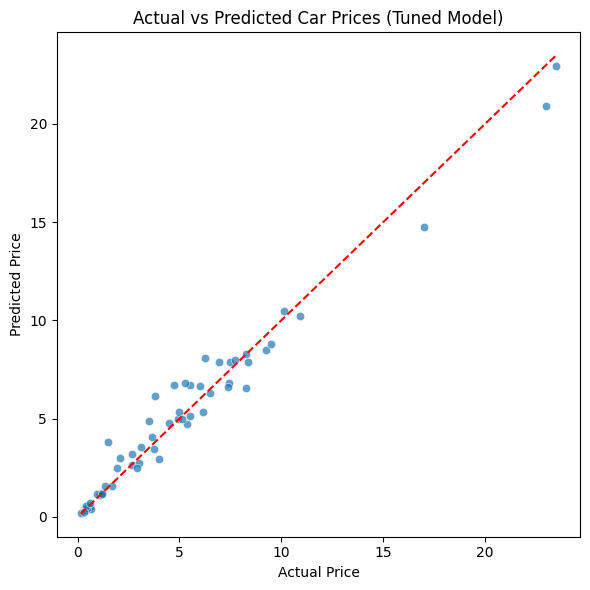

In [11]:
# Feature Importance Plot
importances = best_rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Tuned Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Tuned Model)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()